In [91]:
import os
import json
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels.formula.api as sm
import scipy
import scipy.stats as st
import seaborn as sns

In [92]:
# continuous_features = ['pronoun', 'verb', 'adj', 'posemo', 'negemo', 'anger', 'sad', 'social', 'informal', 'swear']
data = pd.read_csv("merged.csv")
# lang_data = pd.read_csv("selected_liwc_features.csv")
# for feature in continuous_features:
#     data[feature] = lang_data[feature]


In [93]:
# maintain the same order 
idx = [75,77,12,49,7,50,39,20,23,76,58,64,34,8,71,37,29,74,3,45,40,48,2,62,68,
       81,82,54,69,67,5,30,46,59,70,72,10,87,52,32,33,41,90,55,85,11,21,44,89,
       79,31,14,27,4,57,25,51,47,88,43,9,73,84,18,38,35,78,13,28,80,42,36,56,
       16,6,1,83,66,17,60,26,61,53,22,63,65,15,19,24,86]
# Speech features to extract 
continuous_features   = [("F1", "GeMAPSv01a.conf__F1frequency_sma3nz_amean"),
                        ("F2", "GeMAPSv01a.conf__F2frequency_sma3nz_amean"),
                        ("F3", "GeMAPSv01a.conf__F3frequency_sma3nz_amean"),
                        ("F1_bandwidth", "eGeMAPSv01a.conf__F1bandwidth_sma3nz_amean"),
                        ("F2_bandwidth", "eGeMAPSv01a.conf__F2bandwidth_sma3nz_amean"),
                        ("F3_bandwidth", "eGeMAPSv01a.conf__F3bandwidth_sma3nz_amean"),
                        ("loudness", "eGeMAPSv01a.conf__loudness_sma3_amean"),
                        ("spectral_flux", "eGeMAPSv01a.conf__spectralFlux_sma3_amean"),
                        ("voiced_segments", "eGeMAPSv01a.conf__VoicedSegmentsPerSec")]

# read opensmile features 
opensmile_features = {}
for root, dirs, files in os.walk("/share/workhorse3/mahmoudi/final_trimed_opensmile_mapped"):
    for f in files:
        if f.endswith(".json"):
            fid = int(f.split("_")[0])
            opensmile_file = json.load(open(os.path.join(root, f), 'r'))
            for cf in continuous_features:
                opensmile_features[fid] = dict(zip([x[0] for x in continuous_features], [float(opensmile_file[x[1]]) for x in continuous_features]))

data.drop([36])
        
continuous_features = ["F1","F2","F3","F1_bandwidth","F2_bandwidth","F3_bandwidth","loudness", "spectral_flux", "voiced_segments"]

for f in continuous_features:
    column = []
    for id in idx:
        if id == 36:
            continue
        column.append(opensmile_features[id][f])
    data[f] = pd.Series(column)

In [234]:
target = 'Distress (0) vs. Suicide (1)'
features = ['Depression', 'Self-harm', 'Eye gaze', 'Gender', 'Age', 'Ethnicity', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
numerical_features = ['Depression', 'Self-harm', 'Eye gaze', 'Gender', 'Age', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
#continuous_features = ['Depression']
column_headers = ['Depression', 'Self-harm', 'Eye gaze', 'Distress (0) vs. Suicide (1)', 'Gender', 'Age', 'Ethnicity', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
np_data = data.values
#print(data)

# data[["Crying", 'Distress (0) vs. Suicide (1)']] 
temp = data[data['Social Alienation'] == 1]
temp = temp[temp['Distress (0) vs. Suicide (1)'] == 1]
print(len(temp))

8


In [95]:
# Present summary statistics for categorical variables
for var in column_headers:
    # Provide the count of observations in each category
    if var in continuous_features:
        continue
    print(data.groupby(var).size())
    print("")
    #TODO
    #pass

Depression
0     3
1    11
2     9
3    24
4    22
5    21
dtype: int64

Self-harm
0    54
1    21
2     7
3     8
dtype: int64

Eye gaze
0    18
1    72
dtype: int64

Distress (0) vs. Suicide (1)
0    60
1    30
dtype: int64

Gender
0    36
1    54
dtype: int64

Age
0    50
1    40
dtype: int64

Ethnicity
african                        3
african american               7
american                       9
american/norway                1
black                          4
british                        1
caucasian                     42
caucasian/african american     1
caucassian                     1
indian                         2
latin american                 1
white                         18
dtype: int64

Short-term/Chronic distress
0    64
1    26
dtype: int64

Crying
0    55
1    35
dtype: int64

Hopelessness
0    66
1    24
dtype: int64

Anhedonia
0    89
1     1
dtype: int64

Impulsiveness
0    87
1     3
dtype: int64

Lability
0    86
1     4
dtype: int64

Guilt
0    83
1     7

In [96]:

for var in continuous_features:
    print(data[var].describe())

count     89.000000
mean     682.532834
std       85.986171
min      484.892900
25%      613.339200
50%      686.360600
75%      744.873500
max      887.011200
Name: F1, dtype: float64
count      89.000000
mean     1613.222337
std        78.408490
min      1435.491000
25%      1558.466000
50%      1629.286000
75%      1663.705000
max      1796.787000
Name: F2, dtype: float64
count      89.000000
mean     2548.101506
std        79.378547
min      2349.347000
25%      2500.239000
50%      2553.894000
75%      2606.757000
max      2740.893000
Name: F3, dtype: float64
count      89.000000
mean     1428.322843
std        66.597196
min      1171.254000
25%      1396.534000
50%      1435.078000
75%      1471.118000
max      1591.793000
Name: F1_bandwidth, dtype: float64
count      89.000000
mean     1129.470170
std        81.856469
min       897.527800
25%      1088.927000
50%      1129.404000
75%      1173.583000
max      1372.017000
Name: F2_bandwidth, dtype: float64
count      89.000000
me

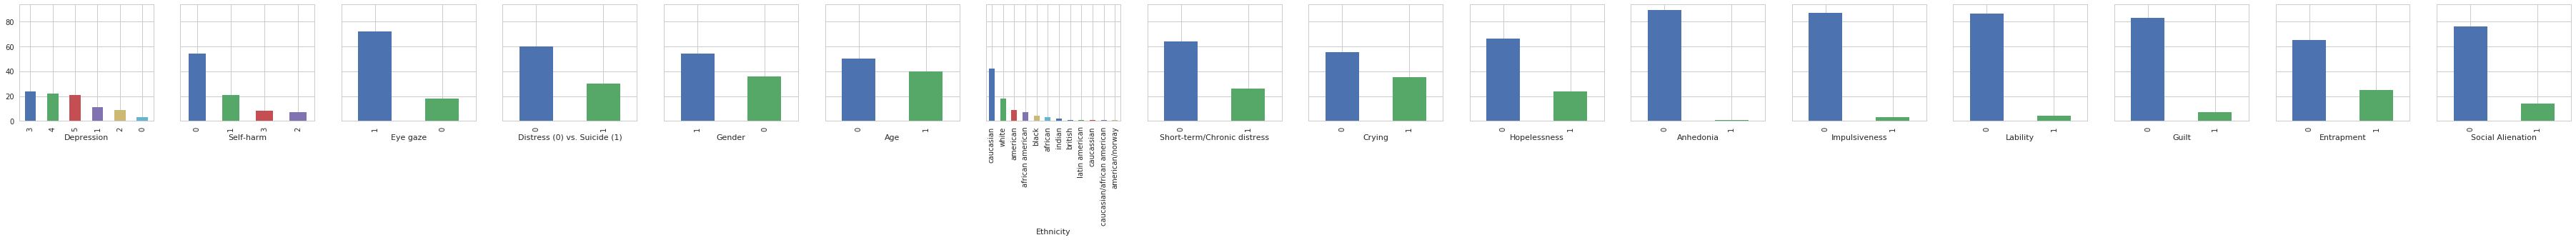

In [97]:
# visualize categorical variables

fig,ax = plt.subplots(
    1, len(column_headers), 
    figsize=(len(column_headers)*4, 3), 
    sharey=True,
)

for i,var in enumerate(column_headers):
    plt.sca(ax[i])
    ax[i].set_xlabel(var)
    ax[i] = data[var].value_counts().plot(kind='bar')
    #TODO
    #pass


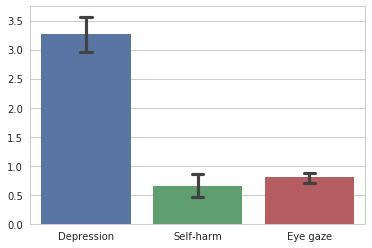

In [98]:
ax = sns.barplot( data=data.loc[:, :'Eye gaze'] , capsize=.1, ci=95)

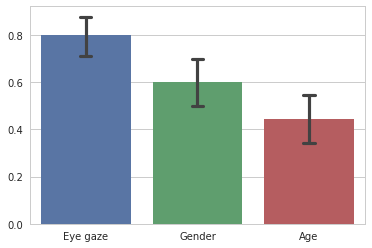

In [99]:
#ax = sns.barplot( data=data.loc[:, 'Eye gaze':'Ethnicity'] , capsize=.1, ci=95)
ax = sns.barplot( data=data.loc[:, ['Eye gaze', 'Gender', 'Age']] , capsize=.1, ci=95)

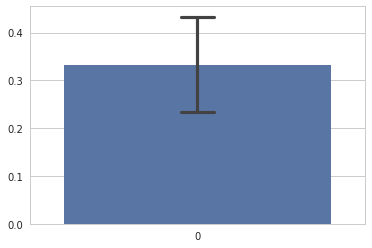

In [100]:
ax = sns.barplot( data=data.loc[:, 'Distress (0) vs. Suicide (1)'] , capsize=.1, ci=95)
                                
                                
                                

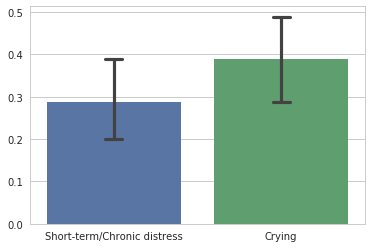

In [101]:
ax = sns.barplot( data=data.loc[:, 'Short-term/Chronic distress':'Crying'] , capsize=.1, ci=95)

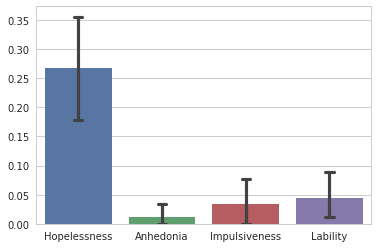

In [102]:
ax = sns.barplot( data=data.loc[:, 'Hopelessness':'Lability'] , capsize=.1, ci=95)

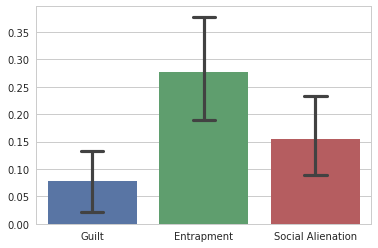

In [103]:
ax = sns.barplot( data=data.loc[:,  'Guilt':'Social Alienation'] , capsize=.2, ci=95)

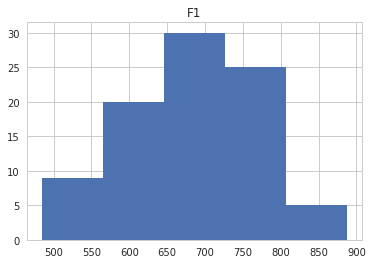

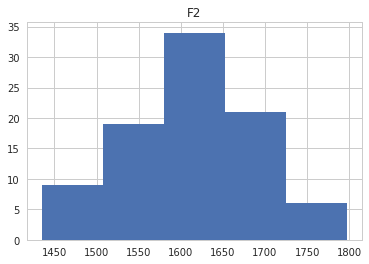

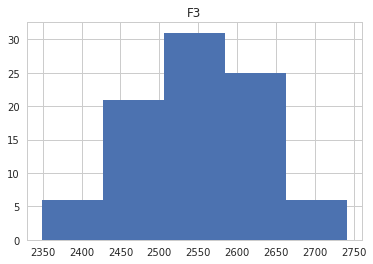

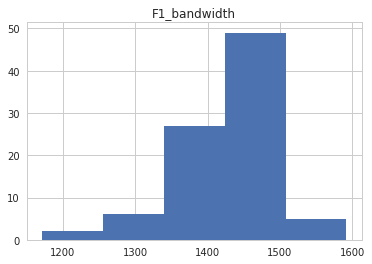

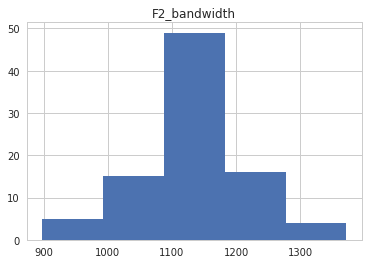

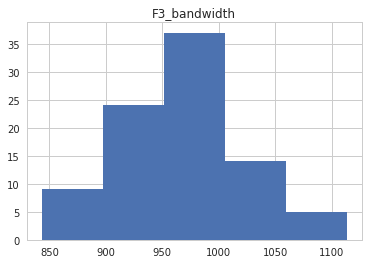

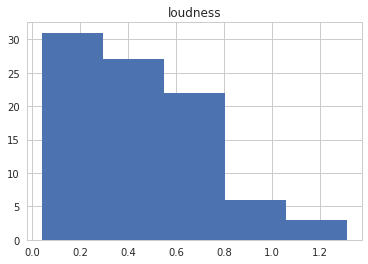

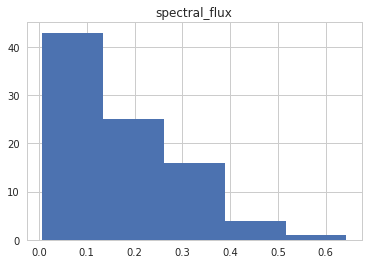

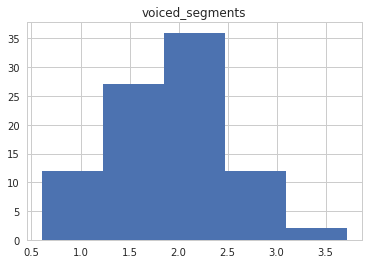

In [104]:
#Visualize continuous variables
for i, var in enumerate(continuous_features):
    data.hist(column=var, bins=5)

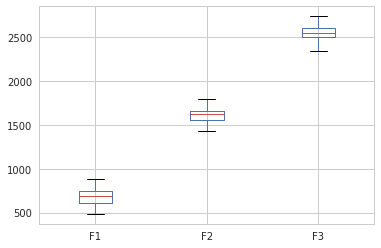

In [105]:
#Visualize continuous variables
data.boxplot(column=continuous_features[:3])

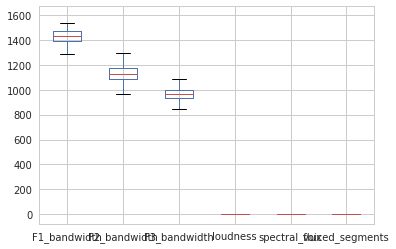

In [106]:
#Visualize continuous variables
data.boxplot(column=continuous_features[3:])

In [54]:
#Visualize continuous variables
# data.boxplot(column=continuous_features[7:])

In [55]:
def bootstrap_ci_arg(x, func=np.mean, feature=None, nboot=2000, interval=0.95, *args, **kwargs):
    """
    Perform nonparametric bootstrap and estimate percentile CI 
    Returns the sample estimate for func 
    and the interval% confidence interval for func
    
    """
    f_val = np.zeros(nboot)
    for i in range(nboot):
        #f_val[i] = x.sample(n=x.shape[0], replace=True, random_state=i).mean()
        if feature == None:
            f_val[i] = func(x.sample(n=x.shape[0], replace=True, random_state=i))
        else:
            f_val[i] = func(x.sample(n=x.shape[0], replace=True, random_state=i), feature=feature)
    #TODO
    #m, ci_l, ci_h = mean_confidence_interval(f_val, interval)
    m = np.median(f_val)
    ci_l = np.percentile(f_val, 2.5)
    ci_h = np.percentile(f_val, 97.5)
    #ci_l, ci_h = sm.DescrStatsW(f_val).tconfint_mean()
    #ci_l, ci_h  = st.t.interval(0.95, len(f_val)-1, loc=np.mean(f_val), scale=st.sem(f_val))
    return  m, ci_l, ci_h, f_val

In [56]:
def standardized_mean_diff(df, feature='Depression', target='Distress (0) vs. Suicide (1)', mean=np.nanmean, std=np.nanstd):
    #TODO
    mean1 = mean(df[df[target] == 0][feature])
    std1 = std(df[df[target] == 0][feature])
    mean2 = mean(df[df[target] == 1][feature])
    std_diff = (mean1 - mean2)/std1
    return std_diff

def mean_diff(df, feature='Depression', target='Distress (0) vs. Suicide (1)', mean=np.nanmean, std=np.nanstd):
    #TODO
    mean1 = mean(df[df[target] == 0][feature])
    mean2 = mean(df[df[target] == 1][feature])
    mean_diff = (mean1 - mean2)
    return mean_diff

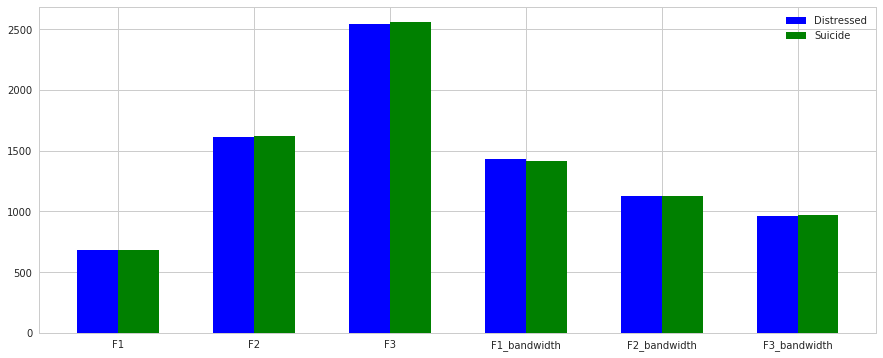

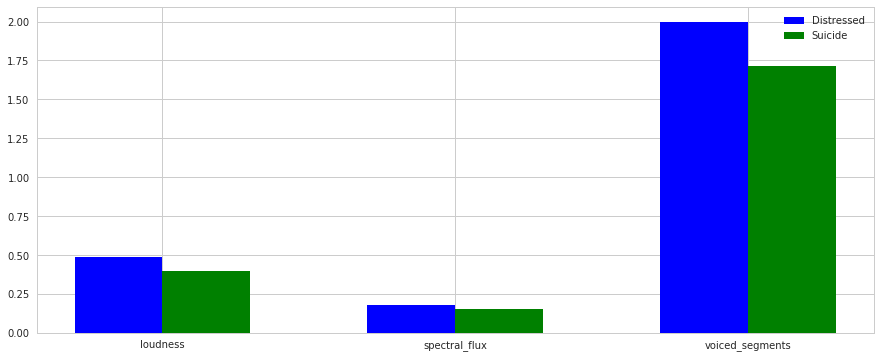

In [213]:
# calculate the count of each numerical variable for the 2 target classes
target='Distress (0) vs. Suicide (1)'
tot_features = numerical_features + continuous_features
means_speech = []
names = []
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    feat_mean = df.groupby(target).agg([np.mean])
    # print(feat_mean)
    if feature in continuous_features:    
        means_speech.append(feat_mean.values)
        names.append(feat_mean.columns[0][0])

distress, suicide = [], []

for i in means_speech:
    distress.append(i[0][0])
    suicide.append(i[1][0])
    
# print(distress)
# print(suicide)


x_axis = np.arange(6)
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(111)
ax1.bar(x_axis, distress[:6], width=0.3, color='b')
ax1.bar(x_axis+0.3, suicide[:6], width=0.3, color='g')
ax1.autoscale(tight=False)
plt.xticks(x_axis+0.15, names[:6])
plt.legend(["Distressed", "Suicide"])
plt.show()

x_axis = np.arange(3)
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(111)
ax1.bar(x_axis, distress[6:], width=0.3, color='b')
ax1.bar(x_axis+0.3, suicide[6:], width=0.3, color='g')
ax1.autoscale(tight=False)
plt.xticks(x_axis+0.15, names[6:])
plt.legend(["Distressed", "Suicide"])
plt.show()


In [58]:
target='Distress (0) vs. Suicide (1)'
tot_features =  numerical_features + continuous_features
cname = []
stddiff = []
ignore = []
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u, f_val = bootstrap_ci_arg(df, func=standardized_mean_diff, feature=feature)
    print("Standardized mean difference (m, c_l, c_u) for "+ feature + " is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if c_l > 0 or c_u < 0:
        print("Statistically significant difference for feature: " + feature)
    else:
        print("Statistically NOT significant difference for feature: " + feature)
        
    print("")
    
    cname.append(feature)
    stddiff.append(f_val)
    if (np.isfinite(m) and np.isfinite(c_l) and np.isfinite(c_u)):
        ignore.append(0)
    else:
        ignore.append(1)

stddiff = np.array(stddiff)
ignore = np.array(ignore)
cname = np.array(cname)
cname = cname[ignore == 0]
stddiff = stddiff[ignore == 0]
stddiff = np.transpose(stddiff)
cname = cname.tolist()
stddiff_pd = pd.DataFrame(stddiff,  columns=cname)
import seaborn as sns
sns.set(style="whitegrid")

new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()
    
    

Standardized mean difference (m, c_l, c_u) for Depression is (-1.3560042951421938, -1.7800331505966938, -0.9252699328613228)
Statistically significant difference for feature: Depression



/home/mahmoudi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Standardized mean difference (m, c_l, c_u) for Self-harm is (-2.1101894665564083, -4.653560484113509, -1.2313873675920797)
Statistically significant difference for feature: Self-harm

Standardized mean difference (m, c_l, c_u) for Eye gaze is (-0.1310870742812706, -0.48350376812363705, 0.3536022039869313)
Statistically NOT significant difference for feature: Eye gaze

Standardized mean difference (m, c_l, c_u) for Gender is (0.19413670627927215, -0.2594506661467978, 0.7072101617501712)
Statistically NOT significant difference for feature: Gender

Standardized mean difference (m, c_l, c_u) for Age is (-0.2890775585242244, -0.7767406675725028, 0.19839873537037506)
Statistically NOT significant difference for feature: Age

Standardized mean difference (m, c_l, c_u) for Short-term/Chronic distress is (-1.6180894921410374, -3.0808099411933227, -0.8933736227313027)
Statistically significant difference for feature: Short-term/Chronic distress

Standardized mean difference (m, c_l, c_u) for Cr

/home/mahmoudi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/mahmoudi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/mahmoudi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Standardized mean difference (m, c_l, c_u) for Impulsiveness is (nan, nan, nan)
Statistically NOT significant difference for feature: Impulsiveness

Standardized mean difference (m, c_l, c_u) for Lability is (nan, nan, nan)
Statistically NOT significant difference for feature: Lability

Standardized mean difference (m, c_l, c_u) for Guilt is (-0.13868546752663163, -1.3890765517201626, 0.2818642174509125)
Statistically NOT significant difference for feature: Guilt

Standardized mean difference (m, c_l, c_u) for Entrapment is (-1.083977093680432, -2.076392459800776, -0.46184430857096326)
Statistically significant difference for feature: Entrapment

Standardized mean difference (m, c_l, c_u) for Social Alienation is (-0.545677316362528, -1.5289323344312375, -0.012299760501283301)
Statistically significant difference for feature: Social Alienation

Standardized mean difference (m, c_l, c_u) for F1 is (-0.029290606398730944, -0.4736654721117224, 0.40939546680781935)
Statistically NOT signif

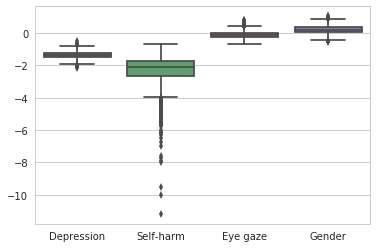

In [59]:
#Can only be run after previous cell has been run
new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()
ax = sns.boxplot(data = stddiff_pd.loc[:, :new_feats[3]]) 
 


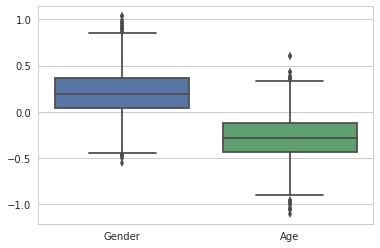

In [61]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[3]:new_feats[4]])

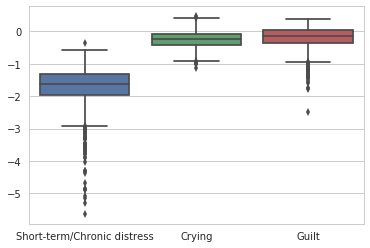

In [62]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[5]:new_feats[7]])

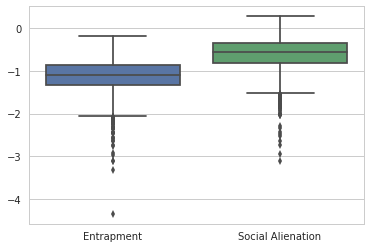

In [63]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[8]:new_feats[9]])

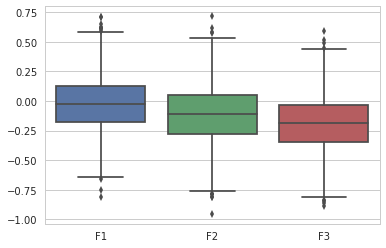

In [64]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[10]:new_feats[12]])

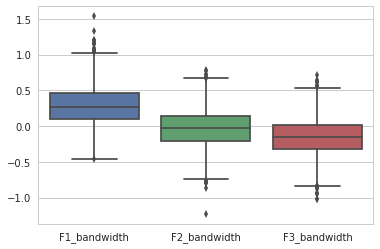

In [69]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[13]:new_feats[15]])

In [70]:
def pearson_corr(df, feature, target='Distress (0) vs. Suicide (1)'): #Pearson Correlation
    #TODO
    corr = scipy.stats.pearsonr(df[feature],df[target])[0]
    return corr

In [82]:
# calculate pearson correlation between features and target
#  and construct a 95% confidence interval
#TODO
target='Distress (0) vs. Suicide (1)'
cname = []
stddiff = []
ignore = []
tot_features = numerical_features + continuous_features
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u, f_val = bootstrap_ci_arg(df, func=pearson_corr, feature=feature)
    print("Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if c_l > 0 or c_u < 0:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")
        
    cname.append(feature)
    stddiff.append(f_val)
    if (np.isfinite(m) and np.isfinite(c_l) and np.isfinite(c_u)):
        ignore.append(0)
    else:
        ignore.append(1)

stddiff = np.array(stddiff)
ignore = np.array(ignore)
cname = np.array(cname)
cname = cname[ignore == 0]
stddiff = stddiff[ignore == 0]
stddiff = np.transpose(stddiff)
cname = cname.tolist()
stddiff_pd = pd.DataFrame(stddiff,  columns=cname)
import seaborn as sns
sns.set(style="whitegrid")

new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()

Correlation (m, c_l, c_u) for Depression with target is (0.5595648621298016, 0.37425578317869646, 0.6910952664211782)
Statistically significant correlation for feature: Depression

Correlation (m, c_l, c_u) for Self-harm with target is (0.6541972768513796, 0.49534525984902206, 0.7791652761503914)
Statistically significant correlation for feature: Self-harm

Correlation (m, c_l, c_u) for Eye gaze with target is (0.0626780620441672, -0.15084633517888138, 0.2497152208329055)
Statistically NOT significant correlation for feature: Eye gaze

Correlation (m, c_l, c_u) for Gender with target is (-0.09001800540180055, -0.30689054746525, 0.12036549698973537)
Statistically NOT significant correlation for feature: Gender

Correlation (m, c_l, c_u) for Age with target is (0.1330049837153559, -0.09293202002355799, 0.34156300731357764)
Statistically NOT significant correlation for feature: Age

Correlation (m, c_l, c_u) for Short-term/Chronic distress with target is (0.5351546809515719, 0.34246309965

/home/mahmoudi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/mahmoudi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/mahmoudi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Correlation (m, c_l, c_u) for Anhedonia with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Anhedonia

Correlation (m, c_l, c_u) for Impulsiveness with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Impulsiveness

Correlation (m, c_l, c_u) for Lability with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Lability

Correlation (m, c_l, c_u) for Guilt with target is (0.05945643676931176, -0.1505803942157334, 0.28349580843328753)
Statistically NOT significant correlation for feature: Guilt

Correlation (m, c_l, c_u) for Entrapment with target is (0.4036407778807525, 0.19671865249488252, 0.5963111836923849)
Statistically significant correlation for feature: Entrapment

Correlation (m, c_l, c_u) for Social Alienation with target is (0.21080467168504494, 0.005558594709826657, 0.4207493694223099)
Statistically significant correlation for feature: Social Alienation

Correlation (m, c_l, c_u) fo

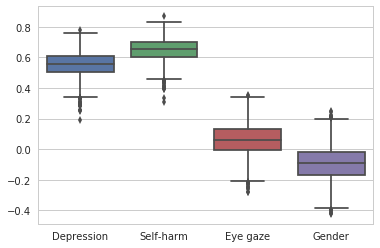

In [83]:
#Run only after running the previous cell
ax = sns.boxplot(data = stddiff_pd.loc[:, :new_feats[3]])

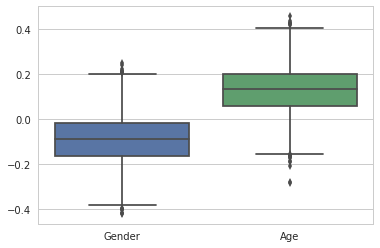

In [84]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[3]:new_feats[4]])

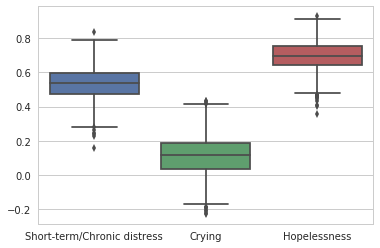

In [85]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[5]:new_feats[7]])

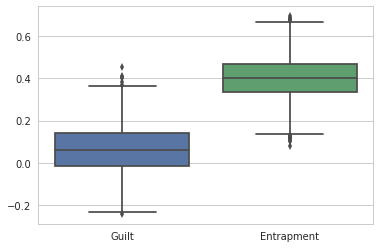

In [86]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[8]:new_feats[9]])

In [87]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[10]:new_feats[12]])

IndexError: list index out of range

In [77]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[13]:new_feats[16]])

IndexError: list index out of range

In [78]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[17]:])

IndexError: list index out of range

In [88]:
import dython #For nominal correlations Cramer's V and Thiel's U
from dython.nominal import *
def cramers_corr(df, feature, target='Distress (0) vs. Suicide (1)'):
    y = df[feature]
    x = df[target]
    corr =  cramers_v(x, y)
    return corr

def thiels_corr(df, feature, target='Distress (0) vs. Suicide (1)'):
    y = df[feature]
    x = df[target]
    corr =  theils_u(x, y)
    return corr

ModuleNotFoundError: No module named 'dython.nominal'

In [ ]:
#import dython #For nominal correlations Cramer's V and Thiel's U
#from dython.nominal import *
#x = data['Distress (0) vs. Suicide (1)']
#y = data['Age']
#cramer_corr = cramers_v(x, y)
#thiels_corr = theils_u(x, y)

#print("Cramer's V correlation is:" + str(cramer_corr))
#print("Thiel's U correlation is:" + str(thiels_corr))

In [89]:
target='Distress (0) vs. Suicide (1)'
for feature in numerical_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u = bootstrap_ci_arg(df, func=cramers_corr, feature=feature)
    print("Cramers Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if m > 0.1:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")

NameError: name 'cramers_corr' is not defined

In [ ]:
target='Distress (0) vs. Suicide (1)'
for feature in numerical_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u = bootstrap_ci_arg(df, func=thiels_corr, feature=feature)
    print("Thiel's Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if m > 0.1:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")

In [ ]:
# estimate a linear regression model to explain the smile_percent variable
#  using the is_female variable, the is_depressed variable, 
#  and their statistical interaction
#TODO
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#selected_features can contain both categorical and continuous features
selected_features = ['Depression', 'Self-harm', 'Short-term/Chronic distress', 'Hopelessness', 'Entrapment', 'Social Alienation', 'negemo', 'anger']
#X = data[numerical_features].values
X = data[selected_features].values
y = data['Distress (0) vs. Suicide (1)'].values
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
#print(numerical_features)
print(selected_features)
print(est2.summary())
